# Random Forest (Titanic Survivor Prediction)

## Penjelasan Kolom:

###
- PassengerId = ID unik untuk setiap penumpang
- Survived = Status keselamatan penumpang (0 = Tidak selamat, 1 = Selamat)
- Pclass = Kelas penumpang (1 = Kelas atas, 2 = Kelas menengah, 3 = Kelas bawah)
- Name = Nama lengkap penumpang
- Sex = Jenis kelamin penumpang (male = laki-laki, female = perempuan)
- Age = Usia penumpang dalam tahun
- SibSp = Jumlah saudara kandung atau pasangan (suami/istri) di kapal
- Parch = Jumlah orang tua atau anak di kapal
- Ticket = Nomor tiket penumpang
- Fare = Harga tiket yang dibayarkan (dalam poundsterling Inggris)
- Cabin = Nomor kabin penumpang (jika tersedia)
- Embarked = Pelabuhan keberangkatan (C = Cherbourg, Q = Queenstown, 
S = Southampton)


## A. Data Preparation

### A.1 Import Libraries

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.set(style='darkgrid', font_scale=1.1)

### A.2 Load Data

In [177]:
try:
    df = pd.read_csv('titanic.csv')
    print("Berhasil membaca csv")
except Exception as e:
    print("Gagal membaca data")

Berhasil membaca csv


### A.3 Melihat 5 Data Teratas dan 5 Data Terbawah

In [178]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [179]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### A.4 Melihat Informasi Data

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### A.5 Melihat Dimensi Data

In [1]:
df.shape

NameError: name 'df' is not defined

### A.6 Cek Data Duplikat

In [182]:
df.duplicated().sum()

np.int64(0)

### A.7 Cek Data Hilang

In [183]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### A.8 Cek Statistik Data

In [184]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.00,446.00,257.35,1.00,223.50,446.00,668.50,891.00
Survived,891.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
Pclass,891.00,2.31,0.84,1.00,2.00,3.00,3.00,3.00
Age,714.00,29.70,14.53,0.42,20.12,28.00,38.00,80.00
SibSp,891.00,0.52,1.10,0.00,0.00,0.00,1.00,8.00
Parch,891.00,0.38,0.81,0.00,0.00,0.00,0.00,6.00
Fare,891.00,32.20,49.69,0.00,7.91,14.45,31.00,512.33


### A.9 Cek Outliers Data

<Figure size 1000x800 with 0 Axes>

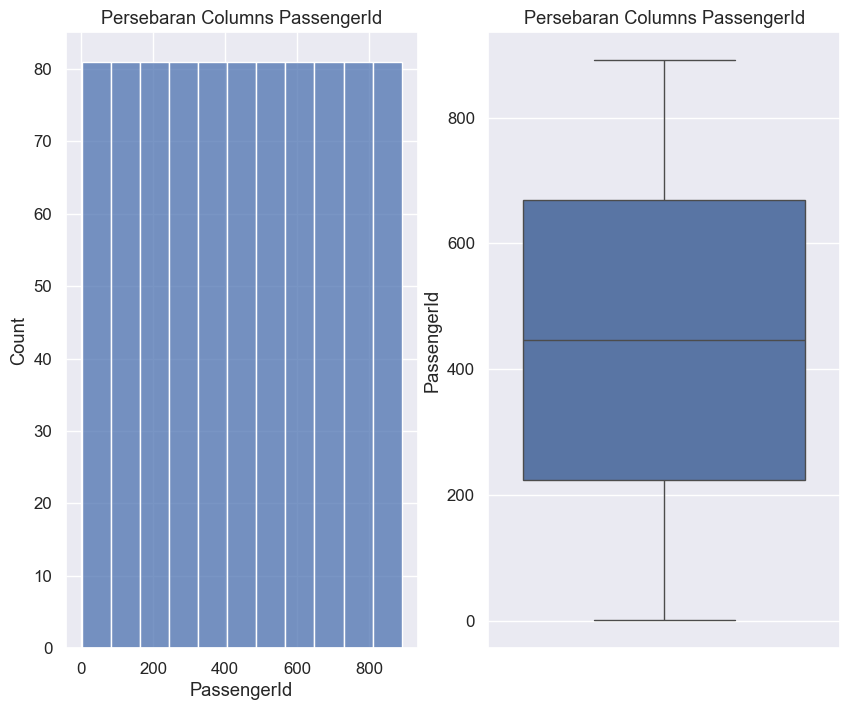

<Figure size 1000x800 with 0 Axes>

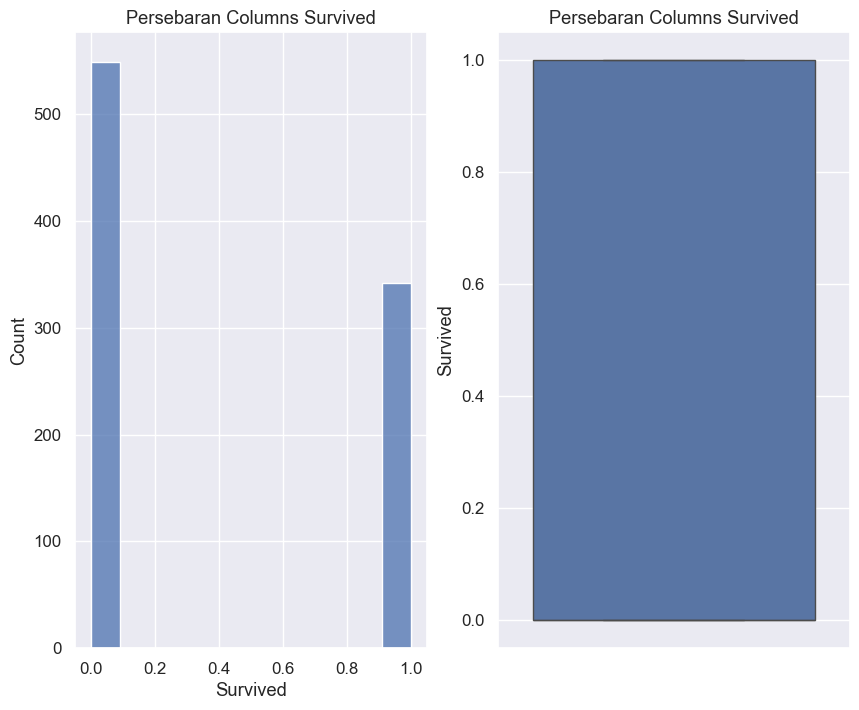

<Figure size 1000x800 with 0 Axes>

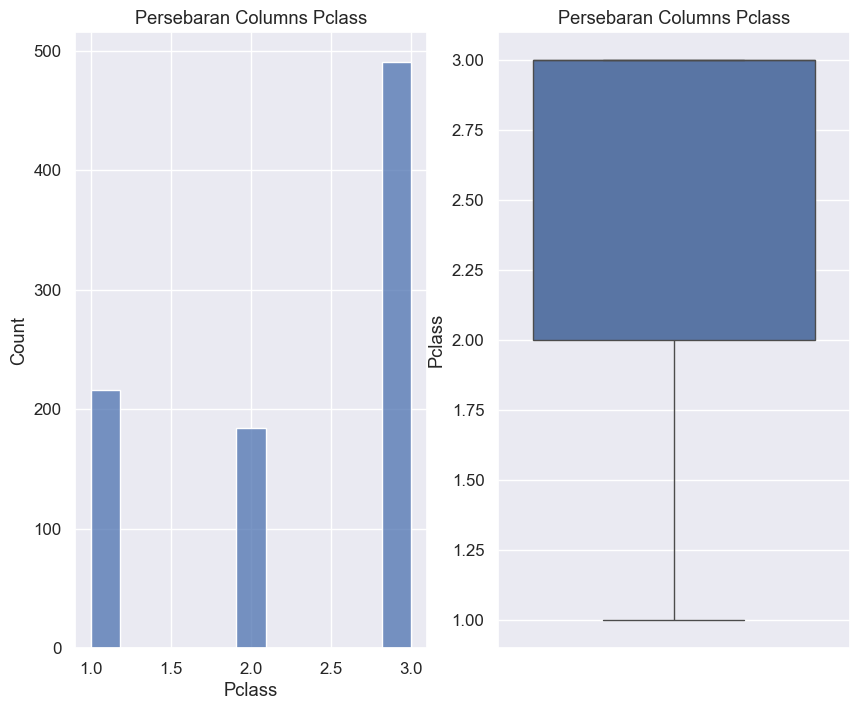

<Figure size 1000x800 with 0 Axes>

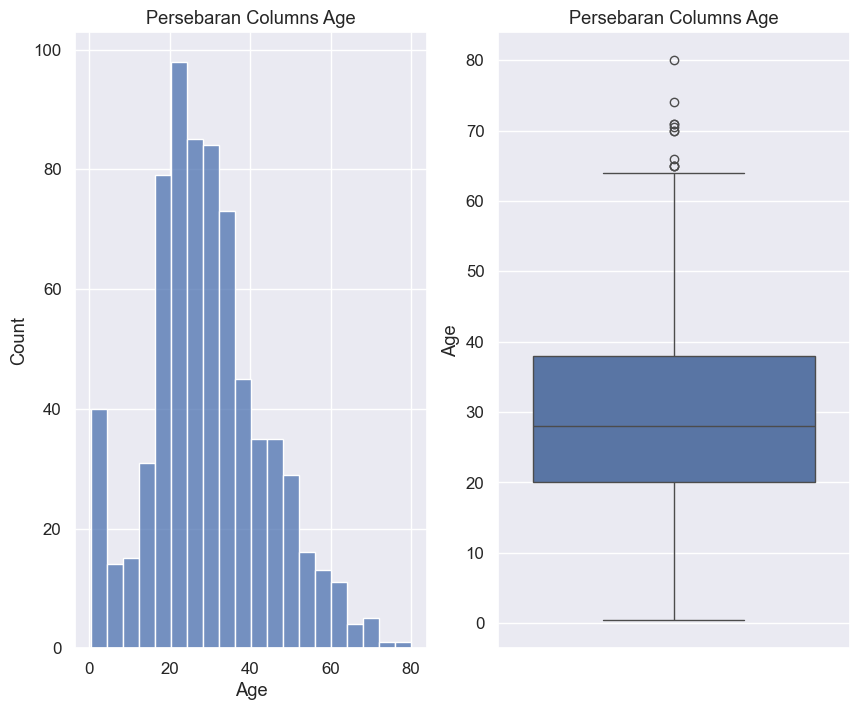

<Figure size 1000x800 with 0 Axes>

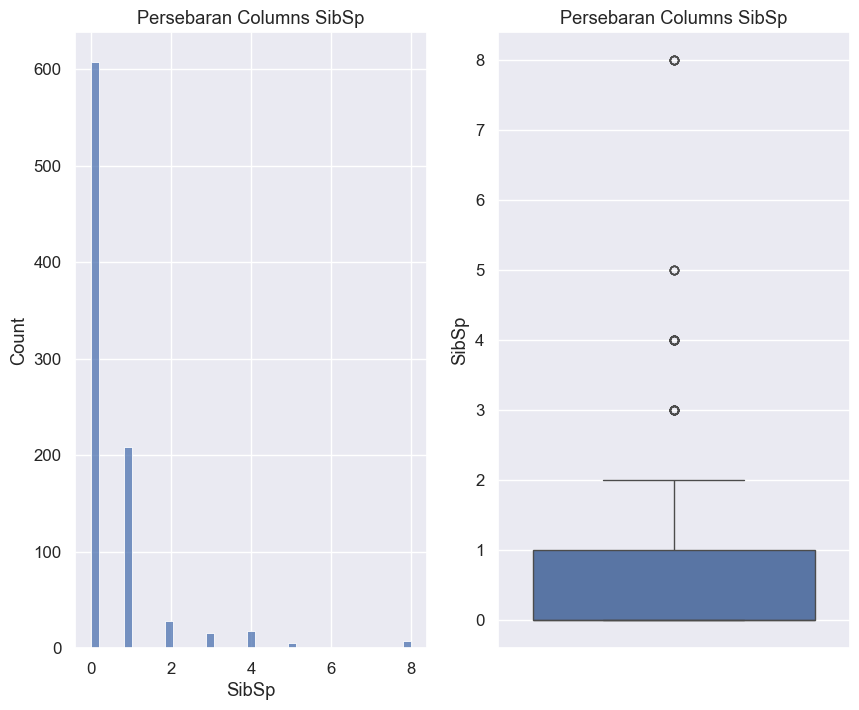

<Figure size 1000x800 with 0 Axes>

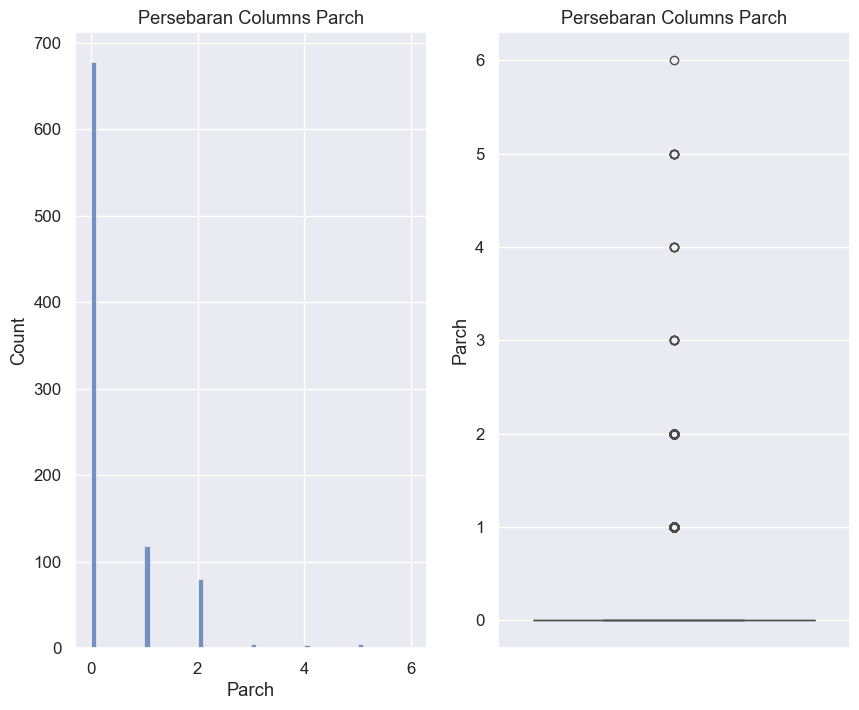

<Figure size 1000x800 with 0 Axes>

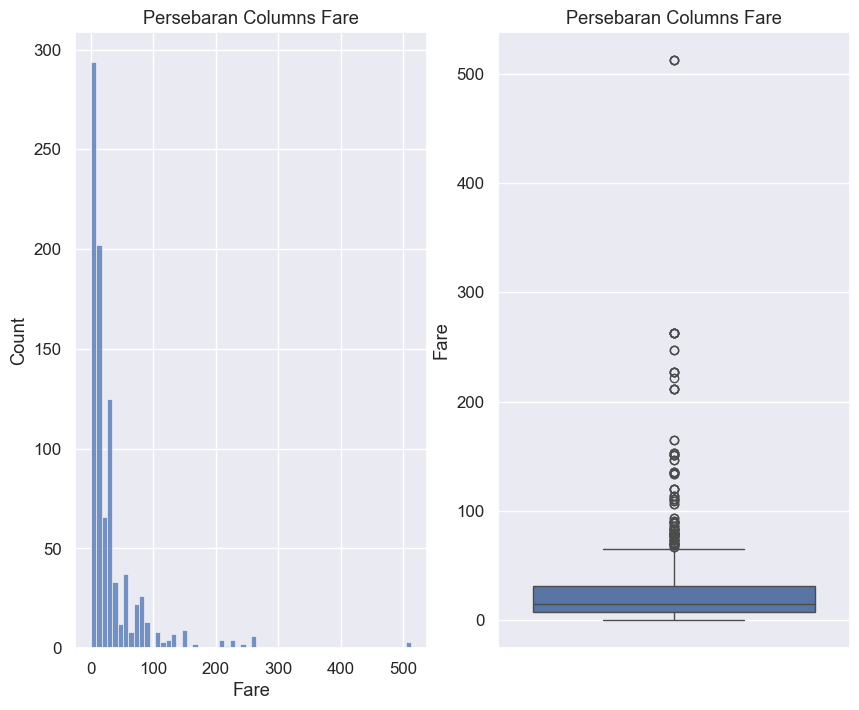

In [185]:
for col in df.select_dtypes(include='number'):
 plt.figure(figsize=(10, 8))
 fig, axes = plt.subplots(1, 2, figsize=(10, 8))
 sns.histplot(df[col], ax = axes[0])
 axes[0].set_title(f"Persebaran Columns {col}")

 sns.boxplot(df[col], ax = axes[1])
 axes[1].set_title(f"Persebaran Columns {col}")


## B. Exploratory data analysis (EDA)

### B.1 Title Extraction

In [186]:
def extract_title(name):
    # Logika: Split berdasarkan koma (,), ambil elemen ke-1.
    # Lalu split berdasarkan titik (.), ambil elemen ke-0.
    return name.split(',')[1].split('.')[0].strip()

df['Title'] = df['Name'].apply(extract_title)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [ ]:
for col in df.select_dtypes(include='object'):
 plt.figure(figsize=(10, 8))
 sns.countplot(df, x=col, palette='Set2')
 plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### B.2 Univariate Analysis

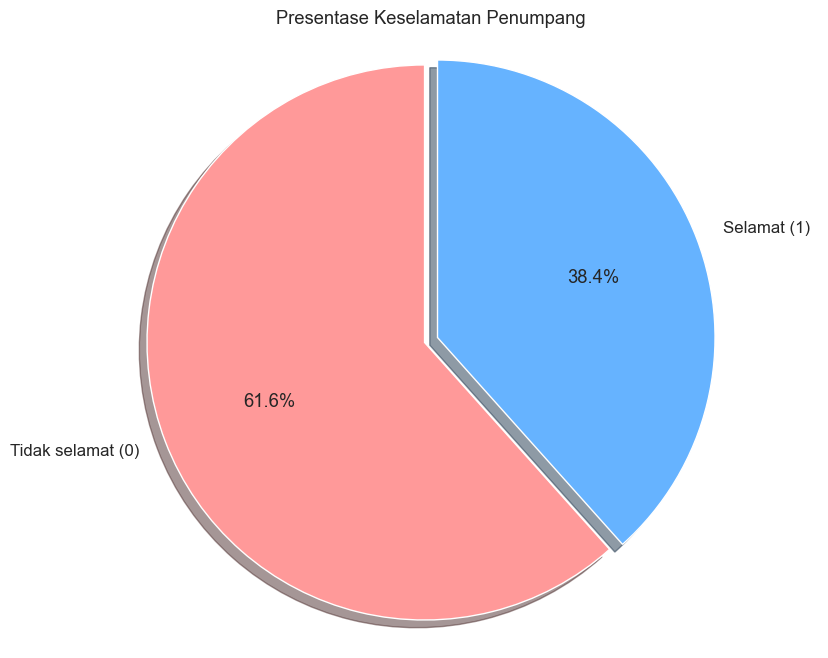

In [188]:
survived = df['Survived'].value_counts()

label = ['Tidak selamat (0)', 'Selamat (1)']

plt.figure(figsize=(10, 8))
plt.pie(survived,
        labels=label,
        autopct = '%1.1f%%', # fungsi untuk menampilkan persen
        startangle=90, # memutar posisi awal 90 derajat
        colors=['#ff9999', '#66b3ff'], # mengatur warna merah muda dan biru
        explode=(0.05, 0), # efek potongan kue
        shadow= True) # mengatur bayangan biar seperti 3D

plt.title("Presentase Keselamatan Penumpang")
plt.axis('equal')  # memastikan bentuknya bundar sempuerna
plt.show()

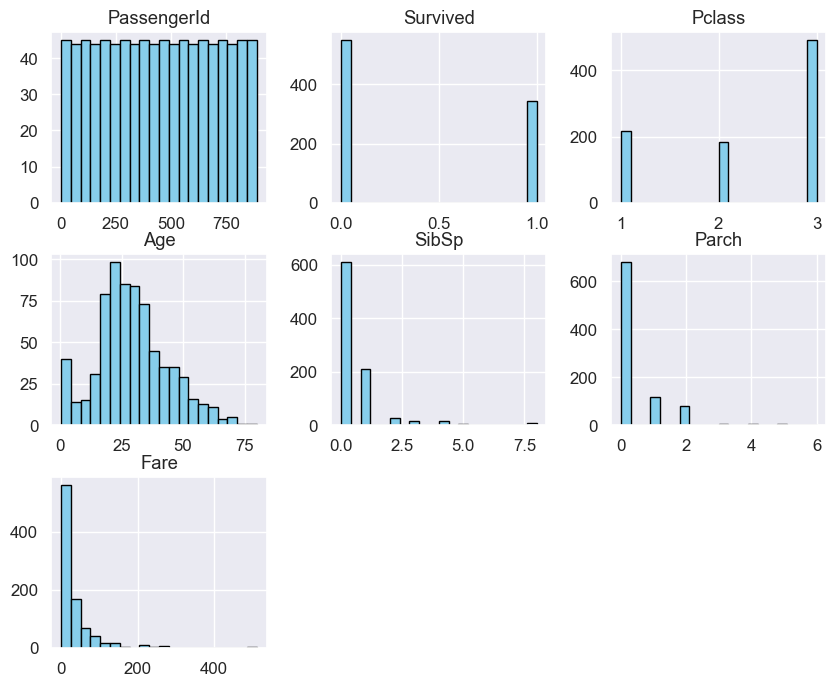

In [189]:
num = df.select_dtypes(include='number')

num.hist(bins = 20, edgecolor = 'black', color='skyblue', figsize=(10, 8))
plt.show()

### B.3 Bivariate Analysis

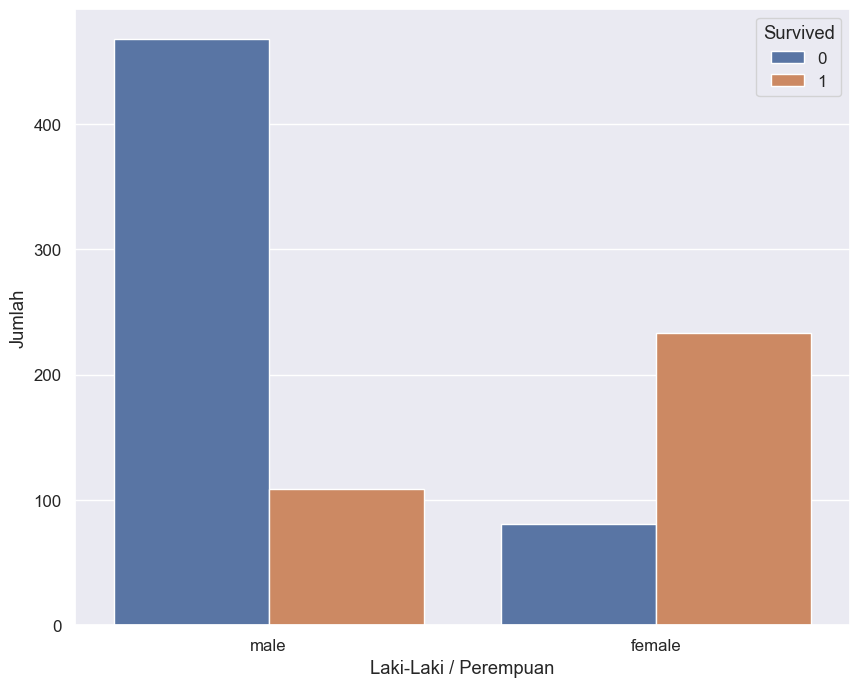

In [190]:
plt.figure(figsize=(10, 8))
sns.countplot(df,x ='Sex', hue='Survived')
plt.xlabel("Laki-Laki / Perempuan")
plt.ylabel("Jumlah")
plt.show()

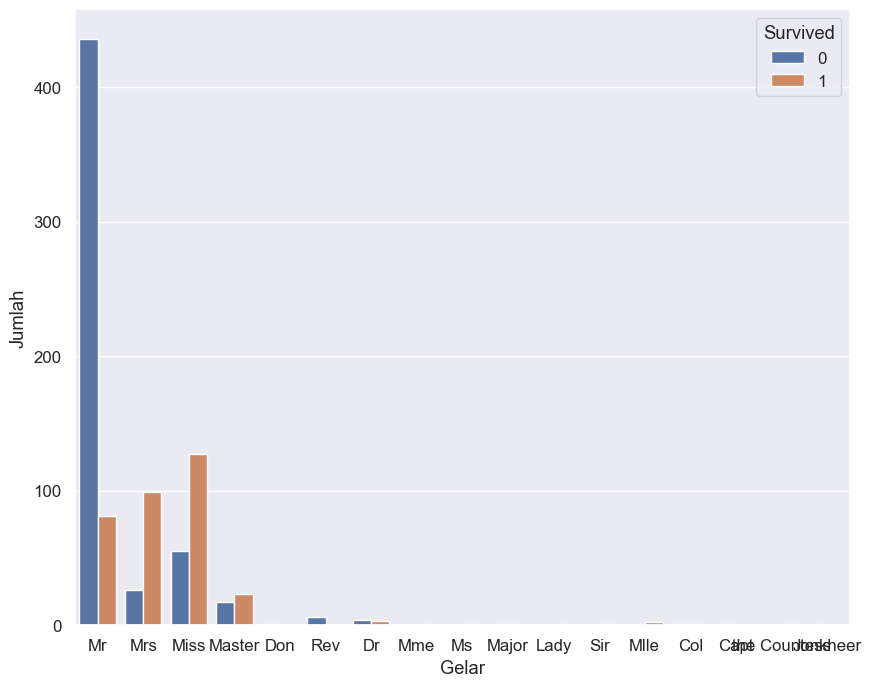

In [191]:
plt.figure(figsize=(10, 8))
sns.countplot(df,x ='Title', hue='Survived')
plt.xlabel("Gelar")
plt.ylabel("Jumlah")
plt.show()

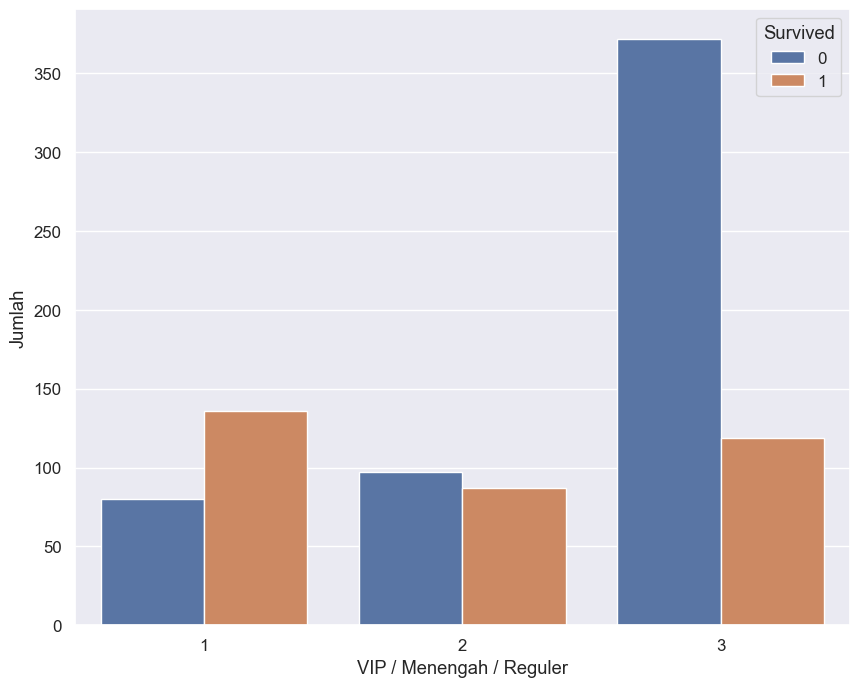

In [192]:
plt.figure(figsize=(10, 8))
sns.countplot(df,x ='Pclass', hue='Survived')
plt.xlabel("VIP / Menengah / Reguler")
plt.ylabel("Jumlah")
plt.show()

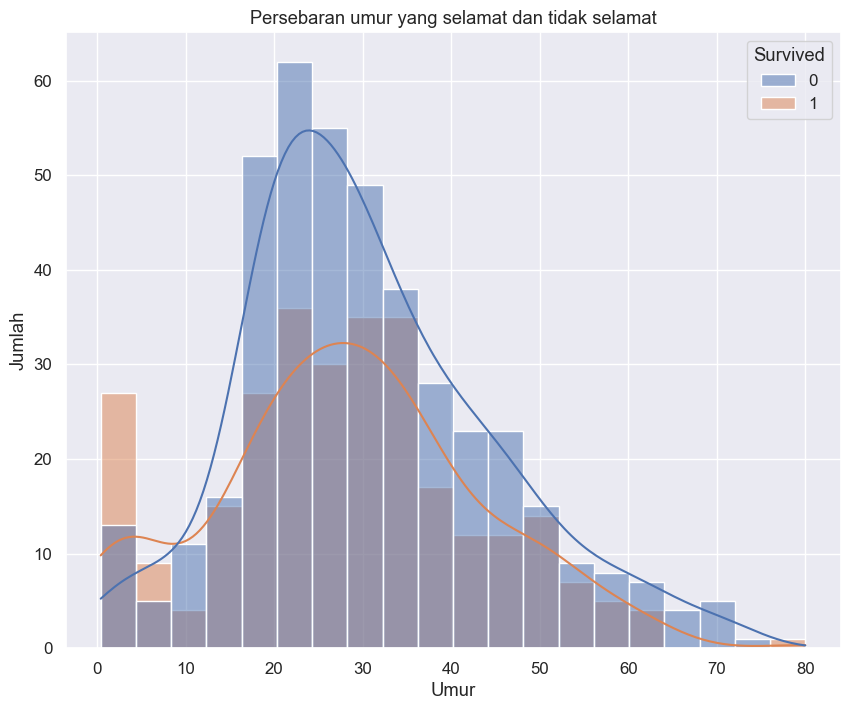

In [193]:
plt.figure(figsize=(10, 8))
sns.histplot(df,x ='Age', hue='Survived', kde=True)
plt.title("Persebaran umur yang selamat dan tidak selamat")
plt.xlabel("Umur")
plt.ylabel("Jumlah")
plt.show()

### B.4 Multivariate Analysis

<Axes: >

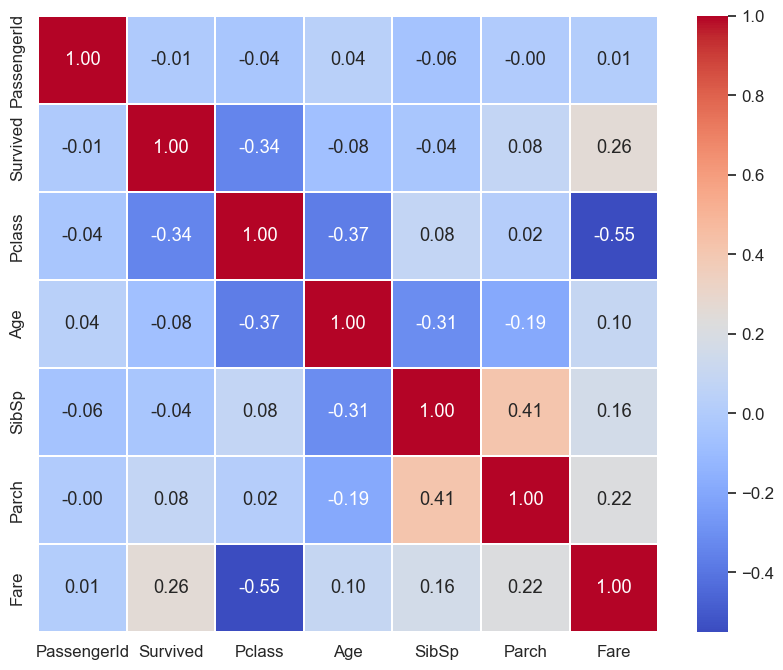

In [194]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            cmap='coolwarm',
            fmt='.2f',
            linewidths=1.1)

## C. Data Preprocessing


### C.1 Handling Outlier

In [195]:
df['SibSp'] = df['SibSp'].clip(1, 4)

### C.2 Handling Missing Values

In [196]:
mode = df[['Embarked', 'Cabin']].mode().iloc[0]
mode

Embarked          S
Cabin       B96 B98
Name: 0, dtype: object

In [197]:
df[['Embarked', 'Cabin']] = df[['Embarked', 'Cabin']].fillna(mode)

In [198]:
mean = df['Age'].mean().round()
mean

np.float64(30.0)

In [199]:
df['Age'] = df['Age'].fillna(mean)

In [200]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

### C.3 Title Encoding

In [201]:
# 1. Definisikan Mapping-nya
title_mapping = {
    'Mr': 0,
    'Miss': 1, 'Ms': 1, 'Mlle': 1,
    'Mrs': 2, 'Mme': 2,
    'Master': 3                     
}

# 2. Terapkan Mapping
df['Title'] = df['Title'].map(title_mapping)

# 3. Handling "Lain-lain" (Dr, Rev, Major, dll)
df['Title'] = df['Title'].fillna(4)

### C.4 Encoding/Mapping

In [202]:
for cols in df.select_dtypes('object'):
    df[cols] = df[cols].astype('category').cat.codes
    
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,108,1,22.0,1,0,523,7.2500,47,2,0.0
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,2.0
2,3,1,3,353,0,26.0,1,0,669,7.9250,47,2,1.0
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,2.0
4,5,0,3,15,1,35.0,1,0,472,8.0500,47,2,0.0


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int16  
 11  Embarked     891 non-null    int8   
 12  Title        891 non-null    float64
dtypes: float64(3), int16(3), int64(5), int8(2)
memory usage: 62.8 KB


## D. Modelling

### D.1 Defining X (Feature) and y (Target) Variables

In [204]:
X_data = df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y_data = df['Survived']

### D.2 Splitting Data Training and Data Testing (80:20)

In [205]:
def stratified_split(X_data, y_data, train_size=0.8, random_state=42):
    np.random.seed(random_state)

    X_train_list, X_test_list = [],[]
    y_train_list, y_test_list = [],[]
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data==class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        X_train_list.append(X_data.iloc[idx[:split_ratio]])
        X_test_list.append(X_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

In [206]:
print("Rasio Penumpang Selamat di Data Asli:")
print(np.mean(y_data == 1)) 

print("\nRasio Penumpang Selamat di Data Training (Hasil Stratified Split):")
print(np.mean(y_train == 1))

Rasio Penumpang Selamat di Data Asli:
0.3838383838383838

Rasio Penumpang Selamat di Data Training (Hasil Stratified Split):
0.38342696629213485


### D.3 Decision Tree 😍😍😍😍😍

#### Menghitung Gini Impurity

In [207]:
def hitung_gini(groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        
        score = 0.0
        group_y = group.iloc[:, -1]
        
        for class_val in classes:
            p = (group_y == class_val).sum() / size
            score += p ** 2
            
        gini += (1.0 - score) * (size / n_instances)
        
    return gini

#### Melakukan Split Data

In [208]:
def split_data(df, feat_idx, threshold):
    left = df[df.iloc[:, feat_idx] < threshold]
    right = df[df.iloc[:, feat_idx] >= threshold]
    
    return left, right

#### Mencari Best Split

In [209]:
def get_best_split(df, classes):
    best_gini = float('inf')
    best_split = {}
    n_features = df.shape[1] - 1
    
    # Ambil sebagian fitur secara acak (Akar Kuadrat dari total )
    n_sample_features = int(np.sqrt(n_features)) 
    feature_indices = np.random.choice(range(n_features), n_sample_features, replace=False)
    
    for feat_idx in feature_indices:
        for index, row in df.iterrows():
            groups = split_data(df, feat_idx, row.iloc[feat_idx])
            gini = hitung_gini(groups, classes)
            
            if gini < best_gini:
                best_gini = gini
                best_split = {
                    'feat_idx' : feat_idx,
                    'val' : row.iloc[feat_idx],
                    'groups' : groups
                }
    return best_split

#### Membangun Pohon (Recursive)

In [210]:
def to_terminal(group):
    return group.iloc[:, -1].mode()[0]

def build_tree(df, classes, depth, max_depth):
    root = get_best_split(df, classes)
    if not root: 
        return to_terminal(df)

    left, right = root['groups']
    del(root['groups'])
    
    if len(left) == 0 or len(right) == 0:
        no_split_data = pd.concat([left, right])
        root['left'] = root['right'] = to_terminal(no_split_data)
        return root
    
    if depth >= max_depth:
        root['left'] = to_terminal(left)
        root['right'] = to_terminal(right)
        return root

    root['left'] = build_tree(left, classes, depth + 1, max_depth)
    root['right'] = build_tree(right, classes, depth + 1, max_depth)
    
    return root

#### Prediksi

In [211]:
def predict_row(node, row):
    if not isinstance(node, dict):
        return node
    
    if row.iloc[node['feat_idx']] < node['val']:
        return predict_row(node['left'], row)
    else:
        return predict_row(node['right'], row)

def predict_batch(tree, df_test):
    predictions = []
    for index, row in df_test.iterrows():
        prediction = predict_row(tree, row)
        predictions.append(prediction)
    return predictions

### D.4 Random Forest 😭😭😭😭😭

#### Training Random Forest (DecTree)

In [213]:
def train_random_forest(data, classes, n_trees, max_depth):
    hutan = []
    
    for i in range(n_trees):
        # 1. BOOTSTRAP: Ambil data secara acak (boleh kembar)
        # frac=1 artinya ambil sebanyak data asli
        data_acak = data.sample(frac=1, replace=True, random_state=i)
        
        # 2. BUAT POHON: Panggil fungsi decision tree-mu yang lama
        # depth mulai dari 1
        pohon = build_tree(data_acak, classes, 1, max_depth)
        
        # 3. MASUKKAN KE HUTAN
        hutan.append(pohon)
        print(f"Pohon ke-{i+1} jadi!")
        
    return hutan

#### Prediksi Random Forest (Voting)

In [214]:
def predict_random_forest(hutan, data_test):
    all_preds = []
    
    for pohon in hutan:
        preds = predict_batch(pohon, data_test)
        all_preds.append(preds)
    
    final_preds = []
    
    # zip(*all_preds) mengubah baris jadi kolom
    for votes in zip(*all_preds):
        # Cari angka yang paling sering muncul (Modus)
        winner = max(set(votes), key=votes.count)
        final_preds.append(winner)
        
    return final_preds

#### Memprediksi Hasil Random Forest

In [ ]:
# Persiapan Data (Gabungkan X_train dan y_train) dan Ambil daftar kelas unik (0.0 dan 1.0)
train_data = pd.concat([X_train, y_train], axis=1)
classes = y_train.unique()

# Membangun Hutan
my_forest = train_random_forest(train_data, classes, n_trees=20, max_depth=8)

# Menghitung Prediksi Hutan
hasil_prediksi_test = predict_random_forest(my_forest, X_test)
hasil_prediksi_train = predict_random_forest(my_forest, X_train)

Pohon ke-1 jadi!
Pohon ke-2 jadi!
Pohon ke-3 jadi!
Pohon ke-4 jadi!
Pohon ke-5 jadi!
Pohon ke-6 jadi!
Pohon ke-7 jadi!
Pohon ke-8 jadi!
Pohon ke-9 jadi!
Pohon ke-10 jadi!
Pohon ke-11 jadi!
Pohon ke-12 jadi!
Pohon ke-13 jadi!
Pohon ke-14 jadi!
Pohon ke-15 jadi!
Pohon ke-16 jadi!
Pohon ke-17 jadi!
Pohon ke-18 jadi!
Pohon ke-19 jadi!
Pohon ke-20 jadi!


In [252]:
my_tree = build_tree(train_data, classes, depth=0, max_depth=7)

## E. Evaluasi

### E.1 Akurasi

#### Akurasi Test

In [244]:
# Mengubah Prediksi Test dan Data Asli Test Menjadi Array
test_array = np.array(y_test)
test_preds_array = np.array(hasil_prediksi_test)

akurasi_test = np.mean(test_preds_array == test_array)
akurasi_test

np.float64(0.8324022346368715)

#### Akurasi Train

In [245]:
# Mengubah Prediksi Train dan Data Asli Train Menjadi Array
train_array = np.array(y_train)
train_preds_array = np.array(hasil_prediksi_train)

akurasi_train = np.mean(train_preds_array == train_array)
akurasi_train

np.float64(0.8679775280898876)

### E.3 Confusion Matrix

In [246]:
TP = np.sum((test_preds_array == 1) & (test_array == 1))
FP = np.sum((test_preds_array == 1) & (test_array == 0))
TN = np.sum((test_preds_array == 0) & (test_array == 0))
FN = np.sum((test_preds_array == 0) & (test_array == 1))

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"True Negatives: {TN}")
print(f"False Negatives: {FN}")

True Positives: 46
False Positives: 7
True Negatives: 103
False Negatives: 23


### E.4 Precision

In [247]:
precision = TP / (TP + FP)
precision

np.float64(0.8679245283018868)

### E.5 Recall

In [248]:
recall = TP / (TP + FN)
recall

np.float64(0.6666666666666666)

### E.6 F-1 Score

In [249]:
f1 = 2 * (precision * recall / precision + recall)
f1

np.float64(2.6666666666666665)

### E.7 Visualisasi Tree

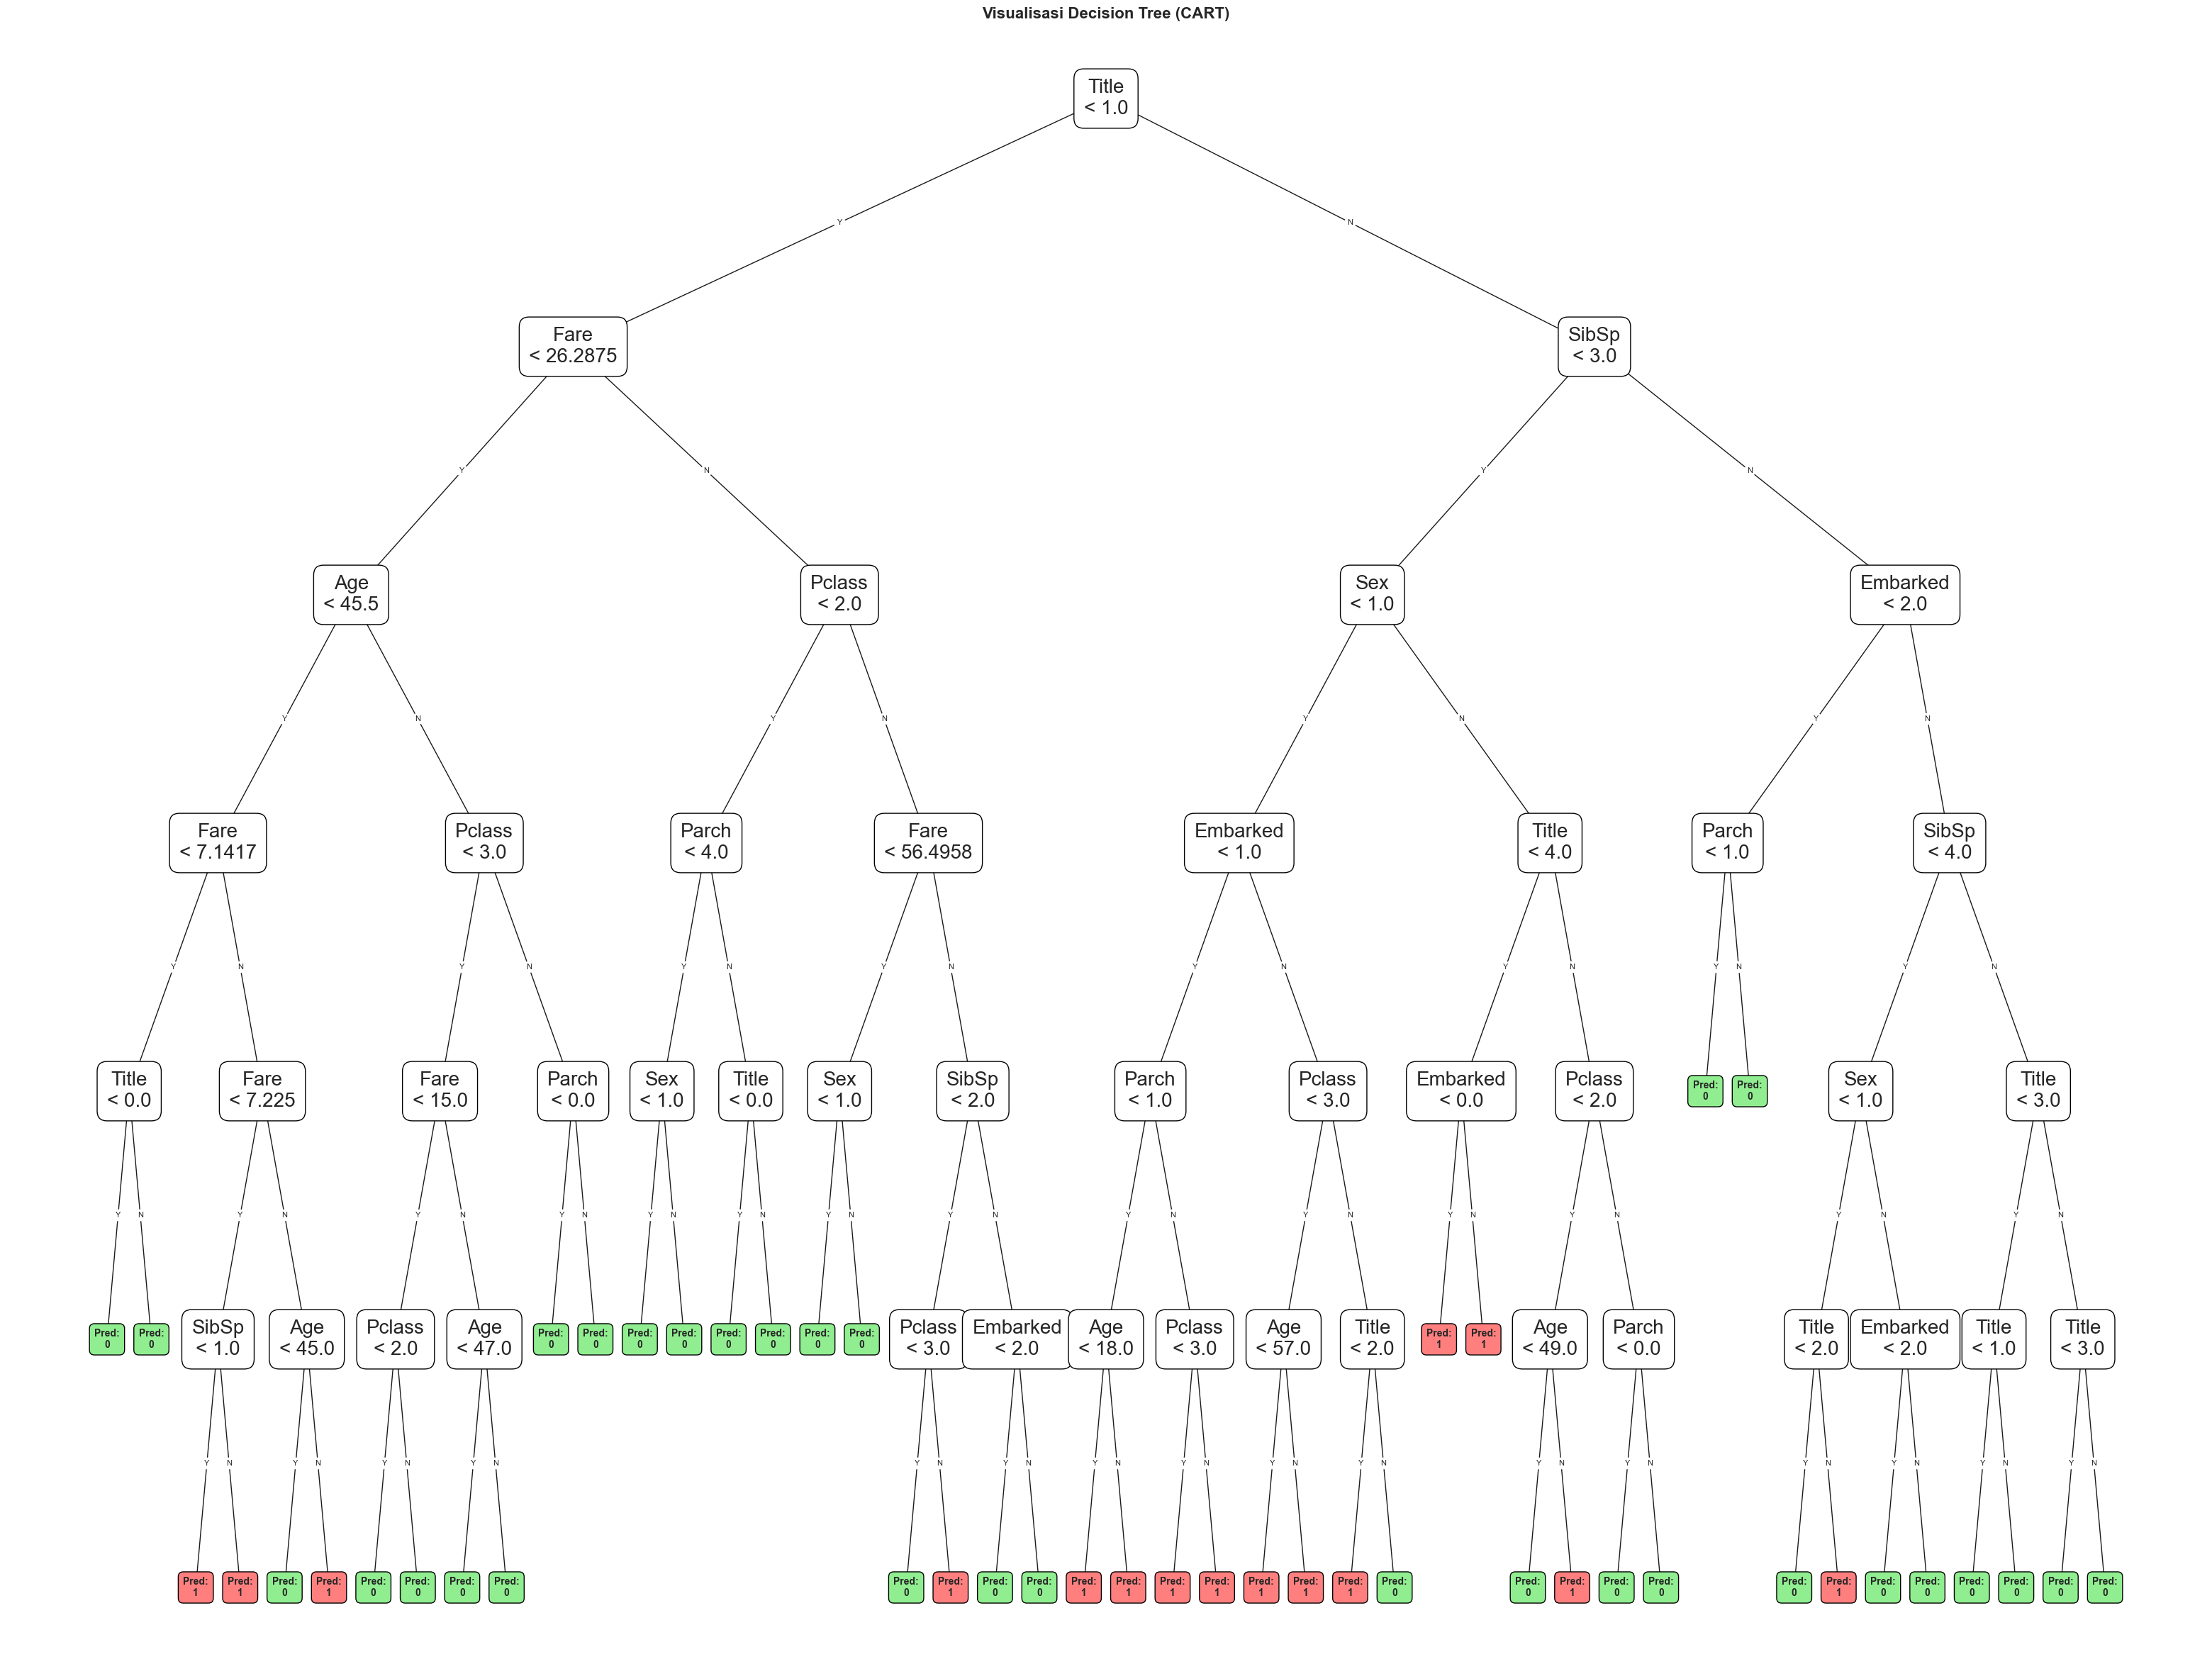

In [250]:
def get_width(node):
    if not isinstance(node, dict):
        return 1
    return get_width(node['left']) + get_width(node['right'])

# 2. Fungsi Bantu: Hitung Kedalaman Pohon
def get_depth(node):
    if not isinstance(node, dict):
        return 1
    return max(get_depth(node['left']), get_depth(node['right'])) + 1

# 3. Fungsi Utama: Menggambar Pohon
def plot_tree_visual(node, feature_names, ax=None, 
                     left_lim=0, right_lim=10, y=10, level_height=2):
    
    # Kalau kanvas belum ada, bikin baru
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.axis('off') # Hilangkan sumbu X/Y biar bersih

    # --- KONDISI 1: JIKA DAUN (LEAF) ---
    if not isinstance(node, dict):
        text = f"Pred:\n{int(node)}"
        
        # Warna: Hijau untuk Aman (0), Merah untuk Kecelakaan (1)
        color = "#90EE90" if node == 0 else "#FF7F7F" 
        bbox_props = dict(boxstyle="round,pad=0.5", fc=color, ec="black", lw=1)
        
        # Gambar kotak daun tepat di tengah area yang tersedia
        ax.text((left_lim + right_lim)/2, y, text, ha="center", va="center", 
                bbox=bbox_props, fontsize=10, fontweight='bold')
        return

    # --- KONDISI 2: JIKA CABANG (INTERNAL NODE) ---
    # Hitung titik tengah untuk node ini
    mid_x = (left_lim + right_lim) / 2
    
    # Ambil info fitur
    feat_name = feature_names[node['feat_idx']]
    threshold = node['val']
    text = f"{feat_name}\n< {threshold}"
    
    # Gambar kotak keputusan (Warna Putih)
    bbox_props = dict(boxstyle="round,pad=0.5", fc="white", ec="black", lw=1)
    ax.text(mid_x, y, text, ha="center", va="center", bbox=bbox_props, fontsize=20, zorder=20)
    
    # --- LOGIKA POSISI ANAK ---
    # Kita bagi ruang horizontal berdasarkan jumlah daun anak kiri & kanan
    n_left = get_width(node['left'])
    n_right = get_width(node['right'])
    total_n = n_left + n_right
    
    # Tentukan garis pembatas area kiri dan kanan
    split_x = left_lim + (right_lim - left_lim) * (n_left / total_n)
    
    # Posisi Y anak (turun ke bawah)
    child_y = y - level_height
    
    # Titik tengah anak kiri & kanan
    left_child_x = (left_lim + split_x) / 2
    right_child_x = (split_x + right_lim) / 2
    
    # Gambar Garis ke Kiri (Yes/True)
    ax.plot([mid_x, left_child_x], [y, child_y], 'k-', lw=1)
    ax.text((mid_x + left_child_x)/2, (y + child_y)/2, "Y", 
            ha="center", va="center", fontsize=8, 
            bbox=dict(boxstyle="circle", fc="white", ec="none"))
    
    # Gambar Garis ke Kanan (No/False)
    ax.plot([mid_x, right_child_x], [y, child_y], 'k-', lw=1)
    ax.text((mid_x + right_child_x)/2, (y + child_y)/2, "N", 
            ha="center", va="center", fontsize=8, 
            bbox=dict(boxstyle="circle", fc="white", ec="none"))
    
    # --- REKURSIF: GAMBAR ANAKNYA ---
    plot_tree_visual(node['left'], feature_names, ax, left_lim, split_x, child_y, level_height)
    plot_tree_visual(node['right'], feature_names, ax, split_x, right_lim, child_y, level_height)

# --- CARA PAKAI ---
feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']

plt.figure(figsize=(40, 30)) # Sesuaikan ukuran gambar
ax = plt.gca()
ax.axis('off')
plot_tree_visual(my_tree, feature_names, ax=ax)
plt.title("Visualisasi Decision Tree (CART)", fontsize=16, fontweight='bold')
plt.show()

### E.8 Visualisasi Decision Boundary

Melatih model mini untuk visualisasi...
Sedang memprediksi area (tunggu sebentar)...


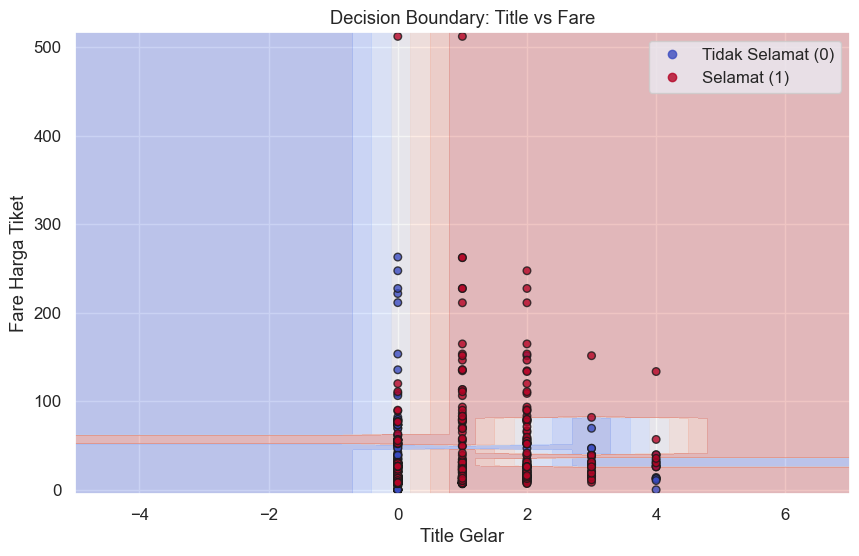

In [251]:
feat_1 = 'Title'
feat_2 = 'Fare'

# Ambil data khusus 2 kolom ini + Targetnya dari data balanced kamu
X_vis = train_data[[feat_1, feat_2]]
y_vis = train_data['Survived']
data_vis = pd.concat([X_vis, y_vis], axis=1)

print("Melatih model mini untuk visualisasi...")
# Latih pohon baru (simpel aja, depth 5) pakai fungsi buatanmu
# Pastikan 'unique_classes' sudah ada dari kode sebelumnya
tree_vis = build_tree(data_vis, unique_classes, depth=0, max_depth=5) 

# --- 2. PERSIAPAN GRID (JARING TITIK) ---
# Bikin rentang X dan Y (biar gambarnya luas mencakup semua data)
x_min, x_max = X_vis[feat_1].min() - 5, X_vis[feat_1].max() + 5
y_min, y_max = X_vis[feat_2].min() - 5, X_vis[feat_2].max() + 5

# Bikin meshgrid (titik-titik halus buat background warna)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 2), # step 2 biar gak berat
                     np.arange(y_min, y_max, 2))

# --- 3. PREDIKSI AREA ---
# Siapkan data pura-pura dari grid tadi buat diprediksi
grid_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[feat_1, feat_2])

# Pakai fungsi prediksimu yang 'predict_batch'
print("Sedang memprediksi area (tunggu sebentar)...")
Z = predict_batch(tree_vis, grid_data) 
Z = np.array(Z).reshape(xx.shape)

# --- 4. GAMBAR HASILNYA ---
plt.figure(figsize=(10, 6))

# Gambar daerah kekuasaan (Merah vs Biru)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Gambar titik data asli (Scatter Plot)
scatter = plt.scatter(X_vis[feat_1], X_vis[feat_2], c=y_vis, 
                      s=30, edgecolor='k', cmap='coolwarm', alpha=0.8)

plt.xlabel(f'{feat_1} Gelar')
plt.ylabel(f'{feat_2} Harga Tiket')
plt.title(f'Decision Boundary: {feat_1} vs {feat_2}')
plt.legend(handles=scatter.legend_elements()[0], labels=['Tidak Selamat (0)', 'Selamat (1)'])
plt.show()